In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data Exploration

In [23]:
daily_cases_scores = pd.read_csv('../datasets/cases_scores_06-2020-07-2020.csv')
daily_cases_scores['day'] = pd.to_datetime(daily_cases_scores['day'] )

In [24]:
daily_cases_scores.columns

Index(['day', 'state', 'cases_7d_avg_per_100k', 'deaths_7d_avg_per_100k',
       'saho_score_7d_avg', 'sor_score_7d_avg', 'fcr_score_7d_avg',
       'factual_score_mean_7d_avg', 'factual_score_std_7d_avg',
       'polarity_score_mean_7d_avg', 'polarity_score_std_7d_avg'],
      dtype='object')

#### Cases

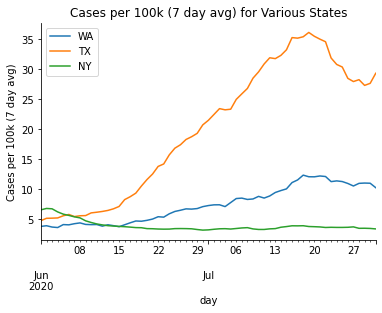

In [25]:
fig, ax = plt.subplots()
wa_cases = daily_cases_scores[daily_cases_scores['state']=='WA']
wa_cases.set_index('day')['cases_7d_avg_per_100k'].plot(ax=ax,label='WA')
tx_cases = daily_cases_scores[daily_cases_scores['state']=='TX']
tx_cases.set_index('day')['cases_7d_avg_per_100k'].plot(ax=ax,label='TX')
ny_cases = daily_cases_scores[daily_cases_scores['state']=='NY']
ny_cases.set_index('day')['cases_7d_avg_per_100k'].plot(ax=ax,label='NY')
ax.set_title('Cases per 100k (7 day avg) for Various States')
ax.set_ylabel('Cases per 100k (7 day avg)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
_ = ax.legend()

In [1]:
# fig, ax = plt.subplots()
# wa_cases = daily_cases_scores[daily_cases_scores['state']=='WA']
# wa_cases.set_index('day')['sor_score_7d_avg'].plot(ax=ax,label='WA')
# tx_cases = daily_cases_scores[daily_cases_scores['state']=='TX']
# tx_cases.set_index('day')['sor_score_7d_avg'].plot(ax=ax,label='TX')
# ny_cases = daily_cases_scores[daily_cases_scores['state']=='NY']
# ny_cases.set_index('day')['sor_score_7d_avg'].plot(ax=ax,label='NY')
# ax.set_title('Status of Reopening score(7 day avg) for Various States')
# ax.set_ylabel('Status of Reopening score (7 day avg)')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# _ = ax.legend()

#### Misinfo/polarity

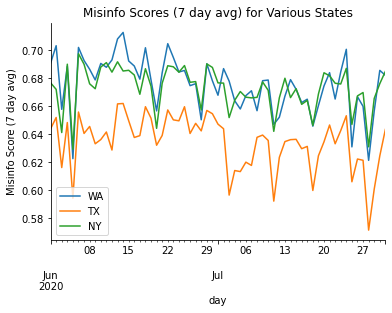

In [5]:
fig, ax = plt.subplots()
wa_cases = daily_cases_scores[daily_cases_scores['state']=='WA']
wa_cases.set_index('day')['factual_score_mean_7d_avg'].plot(ax=ax,label='WA')
tx_cases = daily_cases_scores[daily_cases_scores['state']=='TX']
tx_cases.set_index('day')['factual_score_mean_7d_avg'].plot(ax=ax,label='TX')
ny_cases = daily_cases_scores[daily_cases_scores['state']=='NY']
ny_cases.set_index('day')['factual_score_mean_7d_avg'].plot(ax=ax,label='NY')
ax.set_title('Misinfo Scores (7 day avg) for Various States')
ax.set_ylabel('Misinfo Score (7 day avg)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
_ = ax.legend()

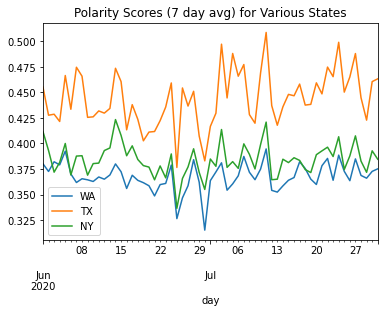

In [6]:
fig, ax = plt.subplots()
wa_cases = daily_cases_scores[daily_cases_scores['state']=='WA']
wa_cases.set_index('day')['polarity_score_mean_7d_avg'].plot(ax=ax,label='WA')
tx_cases = daily_cases_scores[daily_cases_scores['state']=='TX']
tx_cases.set_index('day')['polarity_score_mean_7d_avg'].plot(ax=ax,label='TX')
ny_cases = daily_cases_scores[daily_cases_scores['state']=='NY']
ny_cases.set_index('day')['polarity_score_mean_7d_avg'].plot(ax=ax,label='NY')
ax.set_title('Polarity Scores (7 day avg) for Various States')
_ = ax.legend()

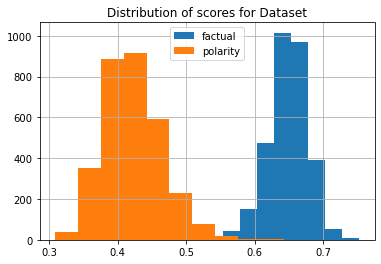

In [7]:
fig, ax = plt.subplots()
daily_cases_scores['factual_score_mean_7d_avg'].hist(ax=ax,label='factual')
daily_cases_scores['polarity_score_mean_7d_avg'].hist(ax=ax,label='polarity')
ax.set_title('Distribution of scores for Dataset')
_ = ax.legend()

### Modeling
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 

In [8]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_percentage_error, explained_variance_score

In [9]:
scaler = StandardScaler()
feats = ['saho_score_7d_avg',
       'sor_score_7d_avg', 'fcr_score_7d_avg', 
       'factual_score_mean_7d_avg', 'polarity_score_mean_7d_avg',
       'factual_score_std_7d_avg', 'polarity_score_std_7d_avg'
]
X = daily_cases_scores[feats]
X = scaler.fit_transform(X)
y = daily_cases_scores['cases_7d_avg_per_100k']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [11]:
len(X_train), len(X_test)

(2488, 623)

In [12]:
clf = RidgeCV(
    alphas=[1e-3, 1e-2, 1e-1, 1],
    cv=5,
    scoring=make_scorer(mean_absolute_percentage_error)
)

In [13]:
clf.fit(X_train,y_train)
clf.alpha_, clf.best_score_

(1.0, 1.241540009624213)

In [14]:
clf = Ridge(alpha=1)

In [15]:
clf.fit(X,y)
clf.score(X_test,y_test), mean_absolute_percentage_error(y_test,clf.predict(X_test))

(0.43674522599635457, 0.9758545327332584)

#### Random Forest Regressor

In [16]:
clf =  RandomForestRegressor()

In [17]:
clf.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
clf.score(X_test,y_test), mean_absolute_percentage_error(y_test,clf.predict(X_test))

(0.6239494448641993, 0.7828573071156366)

In [19]:
clf.feature_importances_

array([0.07361357, 0.33204031, 0.1380743 , 0.08363206, 0.19658585,
       0.09623114, 0.07982276])

In [20]:
fi_scores = np.array(sorted(list(zip(
    [ f.split('_7d_avg')[0] for f in feats ],clf.feature_importances_)), key=lambda x: x[1], reverse=True))

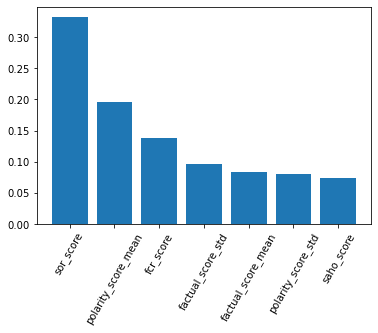

In [21]:
fig, ax = plt.subplots()
ax.bar(x=fi_scores[:,0],height=fi_scores[:,1].astype(float))
ax.tick_params(axis="x", rotation=60)